## Parameters and metrics - challenges (30 points)



These exercises are a little more challenging. You'll get sample
solutions from me.



### Averaging results



Because our simulations are random, the results vary from one run to
another, and the results of a parameter sweep tend to be noisy.  We
can get a clearer picture of the relationship between a parameter and
a metric by running multiple simulations with the same parameter and
taking the average of the results.

Write a function called `run_multiple_simulations` that takes as
parameters `p1`, `p2`, `num_steps`, and `num_runs`.  `num_runs`
specifies how many times it should call `run_simulation`.

After each run, it should store the total number of unhappy customers
(at leap or at city) in a `TimeSeries`.  At the end, it should return
the `TimeSeries`.

Test your function with these parameters:

    p1 = 0.3
    p2 = 0.3
    num_steps = 60
    num_runs = 10

Display the resulting `TimeSeries` and use the `mean` function from
NumPy to compute the average number of unhappy customers.



In [10]:
import matplotlib.pyplot as plt
import numpy as np
from modsim import State, flip, SweepSeries, decorate, TimeSeries

def bike_to_leap(bikeshare):
    if bikeshare.leap == 0:
        bikeshare.leap_empty += 1
        return
    bikeshare.leap -= 1
    bikeshare.city += 1

def bike_to_city(bikeshare):
    bikeshare.city -= 1
    bikeshare.leap += 1

def step(p1, p2, bikeshare):
    if flip(p1):
        bike_to_city(bikeshare)
    if flip(p2):
        bike_to_leap(bikeshare)

def run_simulation(p1, p2, num_steps):
    bikeshare = State(city=6, leap=6, leap_empty=0)
    for i in range(num_steps):
        step(p1, p2, bikeshare)
    return bikeshare.leap_empty

def run_multiple_simulations(p1, p2, num_steps, num_runs):
    results = TimeSeries()
    for i in range(num_runs):
        unhappy_customers = run_simulation(p1, p2, num_steps)
        results[i] = unhappy_customers
    return results

p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10

multiple_runs_results = run_multiple_simulations(p1, p2, num_steps, num_runs)
print(multiple_runs_results)
average_unhappy_customers = np.mean(multiple_runs_results)
print(f"The Average Number of Unhappy Customers is: {average_unhappy_customers}")

#p2_array = np.linspace(0, 1, 101)
#sweep = sweep_p2(p2_array)

Time
0    0
1    0
2    0
3    0
4    0
5    2
6    8
7    0
8    0
9    0
Name: Quantity, dtype: int64
The Average Number of Unhappy Customers is: 1.0


### Sweeping through two parameter value sets



Continuing the previous exercise, use `run_multiple_simulations` to run
simulations with a range of values for `p1` and `p2`.

    p2 = 0.3
    num_steps = 60
    num_runs = 20

Store the results in a `SweepSeries`, then plot the average number of
unhappy customers as a function of `p1`.  Label the axes.

What value of `p1` minimizes the average number of unhappy customers?



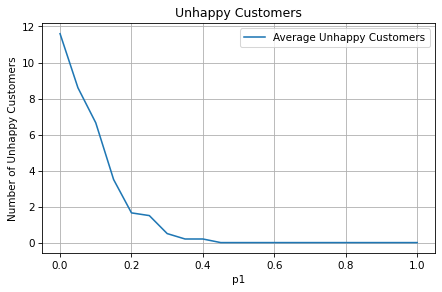

The value of p1 that minimizes the average number of unhappy customers is 0.45


In [13]:
# AI helped me a bit with this second section. I'd say after it's help I have about a 90% understanding of how it all works now with all the systems being combined with the multiple functions intertwined. It complicated things fast and I'm glad the AI was there to fill in some of the gaps where I didn't quite understand.

import matplotlib.pyplot as plt
import numpy as np
from modsim import State, flip, SweepSeries, decorate, TimeSeries

def bike_to_leap(bikeshare):
    if bikeshare.leap == 0:
        bikeshare.leap_empty += 1
        return
    bikeshare.leap -= 1
    bikeshare.city += 1

def bike_to_city(bikeshare):
    bikeshare.city -= 1
    bikeshare.leap += 1

def step(p1, p2, bikeshare):
    if flip(p1):
        bike_to_city(bikeshare)
    if flip(p2):
        bike_to_leap(bikeshare)

def run_simulation(p1, p2, num_steps):
    bikeshare = State(city=6, leap=6, leap_empty=0)
    for i in range(num_steps):
        step(p1, p2, bikeshare)
    return bikeshare.leap_empty

def run_multiple_simulations(p1, p2, num_steps, num_runs):
    results = TimeSeries()
    for i in range(num_runs):
        unhappy_customers = run_simulation(p1, p2, num_steps)
        results[i] = unhappy_customers
    return results

def sweep_p1(p1_values, p2, num_steps, num_runs):
    sweep = SweepSeries()
    for p1 in p1_values:
        results = run_multiple_simulations(p1, p2, num_steps, num_runs)
        sweep[p1] = np.mean(results)
    return sweep

p1_values = np.linspace(0, 1, 21)
p2 = 0.3
num_steps = 60
num_runs = 20

sweep_results = sweep_p1(p1_values, p2, num_steps, num_runs)

plt.plot(sweep_results, label='Average Unhappy Customers')
decorate(xlabel='p1', ylabel='Number of Unhappy Customers',
         title='Unhappy Customers')
plt.grid(True)
plt.legend()
plt.show()

min_p1_index = np.argmin(sweep_results)
min_p1_value = p1_values[min_p1_index]
print(f"The value of p1 that minimizes the average number of unhappy customers is {min_p1_value}")